# 1.	Выбор начальных условий

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import r2_score, mean_squared_error
import warnings

warnings.filterwarnings("ignore")

/Users/22207865/Desktop/multi/Multimedia/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Я выбрал следующий датасет https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

In [3]:
import kagglehub

path = kagglehub.dataset_download("beridzeg45/diamonds-prices-prediction")

print("Path to dataset files:", path)

100%|██████████| 131k/131k [00:00<00:00, 216kB/s]

Extracting files...
Path to dataset files: /Users/22207865/.cache/kagglehub/datasets/beridzeg45/diamonds-prices-prediction/versions/2


In [4]:
!ls /Users/22207865/.cache/kagglehub/datasets/beridzeg45/diamonds-prices-prediction/versions/2

diamonds (cleaned).csv


In [2]:
df = pd.read_csv("/Users/22207865/.cache/kagglehub/datasets/beridzeg45/diamonds-prices-prediction/versions/2/diamonds (cleaned).csv")
df.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


In [3]:
df.columns

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')

Описание фичей

- **Shape** - геометрическая форма бриллианта.
- **Cut** - Качество огранки бриллианта.
- **Color** - Цвет бриллианта от D (бесцветный) до Z.
- **Clarity** - степень чистоты, основанная на дефектах.
- **Carat Weight** - Вес бриллианта в каратах.
- **Length/Width Ratio** - Пропорция длины и ширины.
- **Depth %** - глубина ромба в процентах от его ширины.
- **Table %** - Ширина верхней грани в процентах.
- **Polish** - качество отделки поверхности бриллианта.
- **Symmetry** - Точность формы бриллианта.
- **Girdle** - Толщина грани бриллианта.
- **Culet** - Размер нижней грани.
- **Length** - Длина бриллианта в миллиметрах.
- **Width** - Ширина ромба в миллиметрах.
- **Height** - Высота ромба в миллиметрах.
- **Price** - Цена бриллианта в долларах США ($).
- **Type** - Сертификация или тип происхождения бриллианта.
- **Fluorescence** - уровень УФ-флуоресценции бриллианта.


В данной задаче необходимо предсказать цену (Price) бриллианта на основе его характеристик.


In [4]:
target_columns = 'Price'

X = df.drop(target_columns, axis=1)
y = df[target_columns]

In [5]:
df.dtypes

Shape                  object
Cut                    object
Color                  object
Clarity                object
Carat Weight          float64
Length/Width Ratio    float64
Depth %               float64
Table %               float64
Polish                 object
Symmetry               object
Girdle                 object
Culet                  object
Length                float64
Width                 float64
Height                float64
Price                   int64
Type                   object
Fluorescence           object
dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Првоерим пустые значения
X_train.isna().sum()

Shape                    5
Cut                   3462
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 14
Polish                  17
Symmetry                17
Girdle                  19
Culet                 3668
Length                  17
Width                   17
Height                  17
Type                     0
Fluorescence          4220
dtype: int64

In [8]:
category_features = ["Shape", "Cut", "Color", "Clarity", "Polish", "Symmetry", "Girdle", "Culet", "Type", "Fluorescence"]
numbers_features = set(X_train.columns) - set(category_features)

In [9]:
X_train[category_features] = X_train[category_features].fillna("Unknown")
X_test[category_features] = X_test[category_features].fillna("Unknown")

for num_feature in numbers_features:
    median = df[num_feature].median()
    X_train[num_feature] = X_train[num_feature].fillna(median)
    X_test[num_feature] = X_test[num_feature].fillna(median)

In [10]:
# Првоерим пустые значения
X_train.isna().sum()

Shape                 0
Cut                   0
Color                 0
Clarity               0
Carat Weight          0
Length/Width Ratio    0
Depth %               0
Table %               0
Polish                0
Symmetry              0
Girdle                0
Culet                 0
Length                0
Width                 0
Height                0
Type                  0
Fluorescence          0
dtype: int64

In [11]:
X_train.dtypes

Shape                  object
Cut                    object
Color                  object
Clarity                object
Carat Weight          float64
Length/Width Ratio    float64
Depth %               float64
Table %               float64
Polish                 object
Symmetry               object
Girdle                 object
Culet                  object
Length                float64
Width                 float64
Height                float64
Type                   object
Fluorescence           object
dtype: object

Учитывая, что данная задача является задачей регрессии я выберу метрику R.

# 2.	Создание бейзлайна и оценка качества

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), category_features)
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=2))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn_train = knn_pipeline.predict(X_train)
y_pred_knn_test = knn_pipeline.predict(X_test)

print("=== KNN Regressor ===")
print(f"R² (Train): {r2_score(y_train, y_pred_knn_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_knn_test):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_knn_test):.4f}")

=== KNN Regressor ===
R² (Train): 0.7017
R² (Test): 0.3401
MSE (Test): 7022155.7163


# 3.	Улучшение бейзлайна

In [13]:
X_train[category_features].nunique()

Shape           12
Cut              5
Color            6
Clarity          7
Polish           4
Symmetry         4
Girdle          30
Culet            6
Type             3
Fluorescence     4
dtype: int64

Посмотрим дубликаты

In [14]:
sum(df.duplicated())

3

Статистика по фичам

In [15]:
numeric_stats = X_train.select_dtypes(include=['number']).describe()
category_stats = X_train.select_dtypes(include=['object']).describe()

In [16]:
numeric_stats

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000
mean,1.236120,1.330299,64.166307,61.807055,7.668689,6.100981,3.885235
std,0.511875,0.325753,4.767243,4.730043,1.673897,1.155131,0.599776
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000
75%,1.200000,1.510000,67.500000,64.000000,8.645000,6.610000,4.100000
max,9.380000,2.580000,76.600000,78.000000,15.210000,14.880000,8.170000


In [17]:
category_stats

,Shape,Cut,Color,Clarity,Polish,Symmetry,Girdle,Culet,Type,Fluorescence
count,5188,5188,5188,5188,5188,5188,5188,5188,5188,5188
unique,12,5,6,7,4,4,30,6,3,4
top,Round,Unknown,E,VS1,Excellent,Excellent,Medium to Slightly Thick,Unknown,GIA,Unknown
freq,709,3462,1503,2697,4752,3619,1364,3668,2681,4220


In [18]:
def plot_numerical_histograms(
        data,
        numerical_columns,
        n_cols=4,
        figsize=(20, 15),
        **kwargs
):
    n_plots = len(numerical_columns)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(numerical_columns):
        sns.histplot(data[col], ax=axes[idx], **kwargs)
        axes[idx].set_title(f'Гистограмма {col}', fontsize=14)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Частота', fontsize=12)
        axes[idx].tick_params(axis='both', which='major', labelsize=10)

    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_categorical_countplots(
        data,
        categorical_columns,
        n_cols=4,
        figsize=(20, 15),
        rotation=0,
        **kwargs
):
    n_plots = len(categorical_columns)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, col in enumerate(categorical_columns):
        sns.countplot(x=data[col], ax=axes[idx], **kwargs)
        axes[idx].set_title(f'Countplot {col}', fontsize=14)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Частота', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=rotation, labelsize=10)
        axes[idx].tick_params(axis='y', labelsize=10)

    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_phik_correlation_matrix(
        data,
        numerical_columns,
        vmin=0,
        vmax=1,
        color_map="Greens",
        title="Correlation φk",
        fontsize_factor=1.0,
        figsize=(14,14),
        annotate=True,
        save_path=None
):
    try:
        from phik import phik_matrix
    except ImportError:
        raise ImportError("Библиотека 'phik' не установлена. Установите её с помощью 'pip install phik'.")

    phik_overview = phik_matrix(data, interval_cols=numerical_columns)

    missing_cols = [col for col in numerical_columns if col not in phik_overview.columns]
    if missing_cols:
        raise ValueError(f"Столбцы {missing_cols} отсутствуют в данных.")

    phik_corr = phik_overview.loc[numerical_columns, numerical_columns]

    plt.figure(figsize=figsize)
    sns.heatmap(phik_corr, annot=annotate, fmt=".2f", cmap=color_map, vmin=vmin, vmax=vmax,
                xticklabels=phik_corr.columns, yticklabels=phik_corr.index)

    plt.title(title, fontsize=16 * fontsize_factor)
    plt.xticks(rotation=90, fontsize=12 * fontsize_factor)
    plt.yticks(rotation=0, fontsize=12 * fontsize_factor)
    plt.tight_layout()
    plt.show()

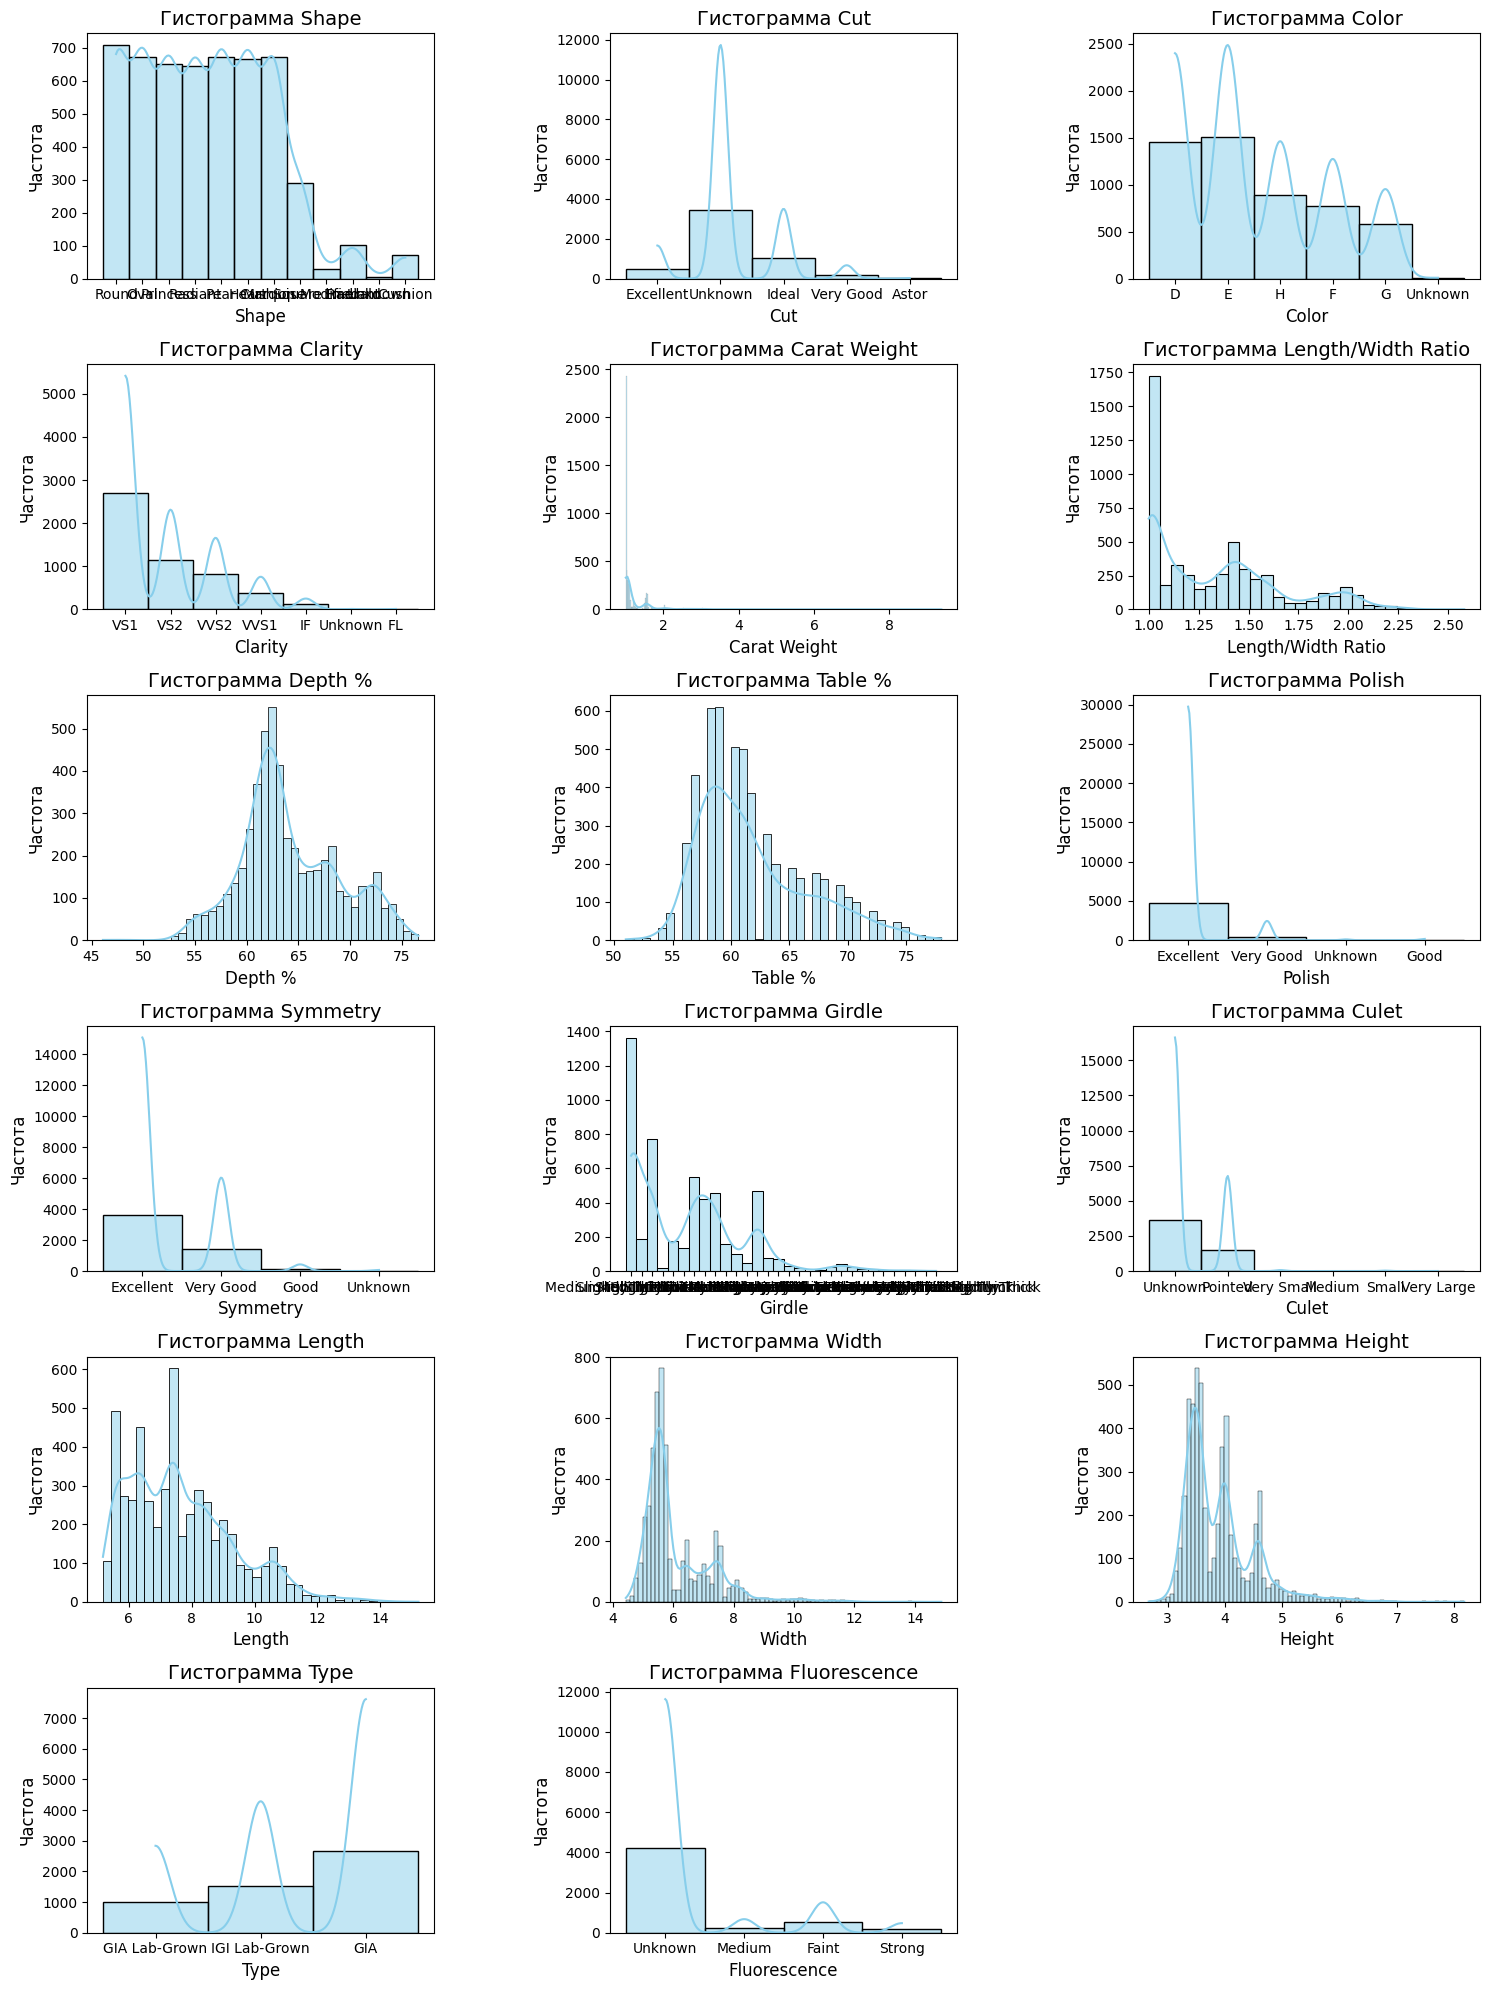

In [19]:
plot_numerical_histograms(
    X_train,
    list(X_train.columns),
    n_cols=3,
    figsize=(15, 20),
    color='skyblue',
    kde=True
)

Есть предположение, что если мы уберем малозначимые признаки относительно корреляции, то мы сможем улучшить качество

In [20]:
corr_df = pd.concat([X_train[list(numbers_features)], y_train], axis=1).corr()
bad_columns = list(corr_df[corr_df["Price"].abs() < 0.1].index)
bad_columns

['Table %']

Уберем признаки где много Unknown

In [21]:
bad_columns = bad_columns + ["Fluorescence", "Cut"]

In [22]:
X_train_filtered = X_train.drop(columns=bad_columns)
X_test_filtered = X_test.drop(columns=bad_columns)

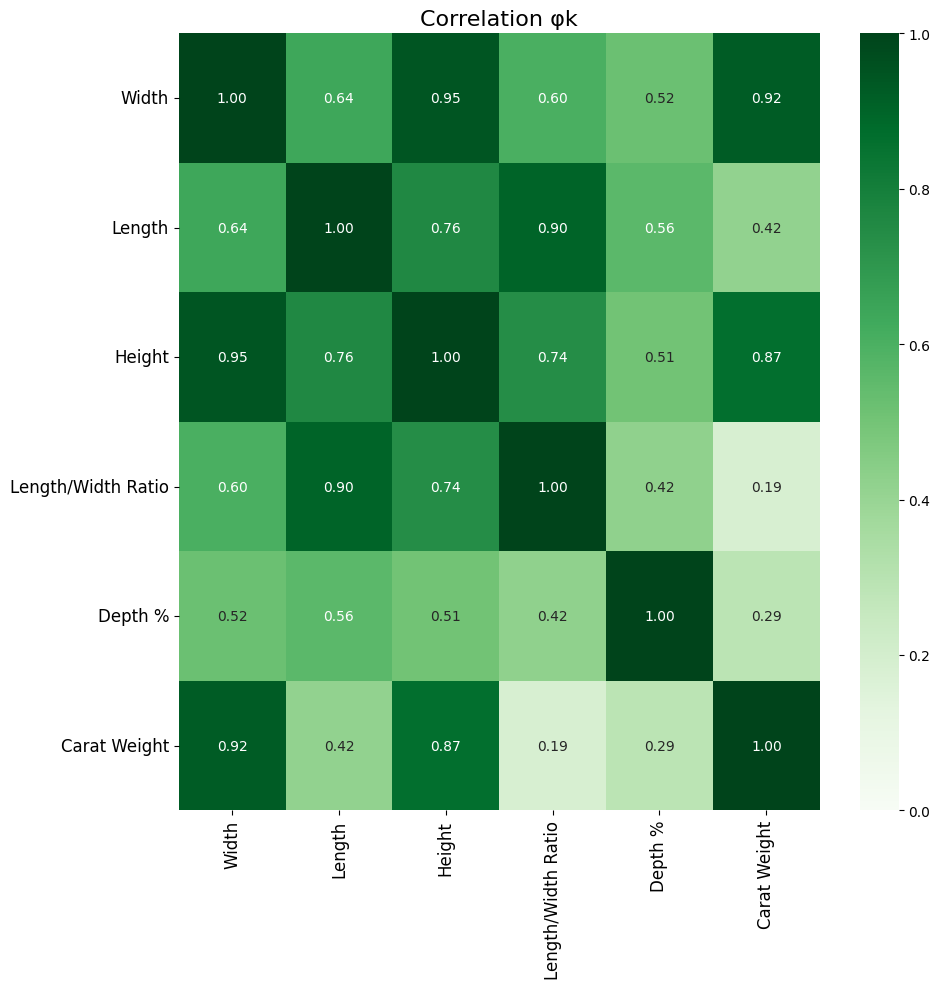

In [23]:
plot_phik_correlation_matrix(pd.concat([X_train_filtered[list(numbers_features - set(bad_columns))], y_train], axis=1), list(numbers_features - set(bad_columns)), figsize=(10, 10))

Обучим модель с улучшенным бейзлайном

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(numbers_features - set(bad_columns))),
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(set(category_features) - set(bad_columns)))
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=20))
])

knn_pipeline.fit(X_train_filtered, y_train)

y_pred_knn_train = knn_pipeline.predict(X_train_filtered)
y_pred_knn_test = knn_pipeline.predict(X_test_filtered)

print("=== KNN Regressor ===")
print(f"R² (Train): {r2_score(y_train, y_pred_knn_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_knn_test):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_knn_test):.4f}")


=== KNN Regressor ===
R² (Train): 0.8481
R² (Test): 0.8213
MSE (Test): 1901958.1903


Попробуем подобрать лучшие гиперпараметры

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'knn__n_neighbors': [2, 4, 6, 8, 12, 16, 20, 26, 30],
    'knn__weights': ['uniform', 'distance'],  # тип весов
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # метрика расстояния
}

grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,  # 5-кратная кросс-валидация
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_filtered, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая метрика R2 на кросс-валидации:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

y_pred_knn_train = best_knn.predict(X_train_filtered)
y_pred_knn_test = best_knn.predict(X_test_filtered)

print("=== KNN Regressor ===")
print(f"R² (Train): {r2_score(y_train, y_pred_knn_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_knn_test):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_knn_test):.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры: {'knn__metric': 'euclidean', 'knn__n_neighbors': 12, 'knn__weights': 'distance'}
Лучшая метрика R2 на кросс-валидации: 0.8368281858672351
=== KNN Regressor ===
R² (Train): 1.0000
R² (Test): 0.8227
MSE (Test): 1886822.9903


# 4. Своя имплементация KNN

In [26]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

from implementations import MyKNN

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), category_features)
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', MyKNN(n_neighbors=2, problem_type="regression"))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn_train = knn_pipeline.predict(X_train)
y_pred_knn_test = knn_pipeline.predict(X_test)

print("=== KNN Regressor ===")
print(f"R² (Train): {r2_score(y_train, y_pred_knn_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_knn_test):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_knn_test):.4f}")

=== KNN Regressor ===
R² (Train): 0.6974
R² (Test): 0.3686
MSE (Test): 6718244.1742


In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(numbers_features - set(bad_columns))),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), list(set(category_features) - set(bad_columns)))
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', MyKNN(n_neighbors=12, problem_type="regression"))
])

knn_pipeline.fit(X_train_filtered, y_train)
y_pred_knn_train = knn_pipeline.predict(X_train_filtered)
y_pred_knn_test = knn_pipeline.predict(X_test_filtered)

print("=== KNN Regressor ===")
print(f"R² (Train): {r2_score(y_train, y_pred_knn_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_knn_test):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_knn_test):.4f}")

=== KNN Regressor ===
R² (Train): 0.8672
R² (Test): 0.8209
MSE (Test): 1905882.4301


Моя имплементация схожа с результатами как и реализация KNN в sklearn.

В ходе анализа данных можно понять что некоторые признаки влияют на целевую переменную больше чем остальные